In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing # For linear regression modelling
from sklearn.model_selection import train_test_split # For splitting the data for testing purposes
import seaborn as sns # For visualisations
import statsmodels.api as sm # For linear regression modelling
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions
import warnings # For handling error messages

# First lets read our data into memory and view the top rows using the pandas head() function
data = pd.read_csv('home_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
data.shape

(21613, 21)

In [0]:
data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
data["date"] = pd.____(data["date"])

In [0]:
data.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [0]:
data.sample(12)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13421,1854900330,2014-09-09,697000,4,2.50,3160,6961,2.0,0,0,3,8,3160,0,2005,0,98074,47.6125,-122.010,3110,5058
17993,4254000620,2014-10-07,410000,3,2.50,1860,15457,2.0,0,0,3,8,1860,0,1997,0,98019,47.7383,-121.955,2040,14055
16336,1214000050,2014-10-20,350000,3,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343,1590,7500
19831,2895730070,2014-06-20,925000,4,2.75,3730,8014,2.0,0,0,3,10,3730,0,2012,0,98074,47.6036,-122.059,3670,8279
13455,7224000450,2014-12-30,230000,6,1.50,1810,4838,1.5,0,0,4,5,1050,760,1905,0,98055,47.4874,-122.202,1300,4838
17151,4107100190,2015-03-24,2500000,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,98004,47.6227,-122.216,4780,18480
12589,2459900040,2014-07-17,587000,5,3.50,3610,52595,2.0,0,0,4,7,3610,0,1989,0,98014,47.6832,-121.907,1620,60112
3027,9320600090,2015-01-27,273500,3,1.50,1560,8314,1.0,0,0,3,7,1560,0,1962,0,98031,47.4117,-122.209,1820,8925
8063,1311910300,2015-02-04,260000,5,2.25,2320,6375,1.0,0,0,4,7,1270,1050,1967,0,98001,47.3351,-122.282,1760,7600
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [0]:
data.date.____()

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [0]:
data["days"] = ____
data["days"] = data["days"].apply(lambda t: t.days)

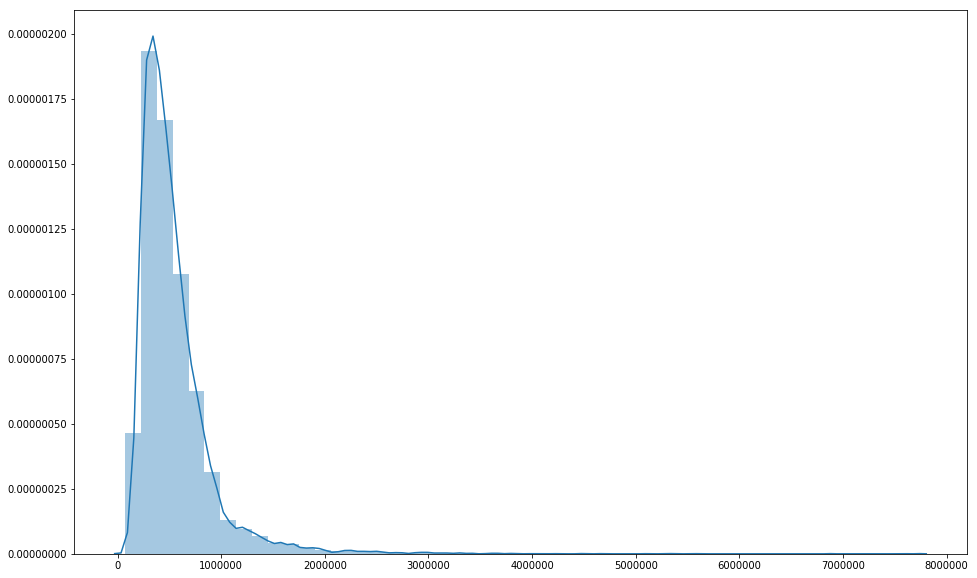

In [0]:
plt.figure(figsize=(16, 10))
sns.distplot(data[["price"]] )

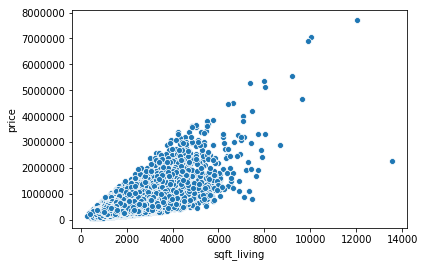

In [0]:
sns.scatterplot(x="sqft_living", y="price", data=data)

In [0]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,180.193078
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,113.048011
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,81.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,167.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,291.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,390.000000


In [0]:
data.describe()
# Check if there are null values?

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,180.193078
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,113.048011
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,81.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,167.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,291.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,390.000000


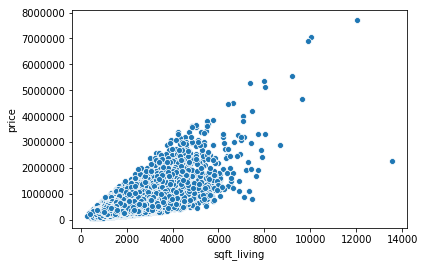

In [0]:
sns.scatterplot(x="sqft_living", y="price", data=data)

In [0]:
sum(data["bathrooms"]== ____)

10

In [0]:
sum(data["bedrooms"]== ____)

13

In [0]:
data.shape

(21613, 22)

In [0]:
data[data["bathrooms"]== ____].index

Int64Index([875, 1149, 3119, 5832, 6994, 9773, 9854, 10481, 14423, 19452], dtype='int64')

In [0]:
data[data["bedrooms"]== ____].index

Int64Index([875, 3119, 3467, 4868, 6994, 8477, 8484, 9773, 9854, 12653, 14423,
            18379, 19452],
           dtype='int64')

In [0]:
print(___.shape)
index_to_drop = ____.index

(16, 22)


In [0]:
data.drop(index_to_drop, inplace =True)

In [0]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,180.180997
std,2.876736e+09,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,113.059987
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,81.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,167.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,291.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,390.000000


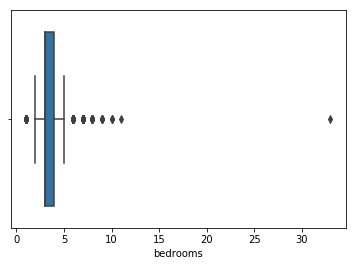

In [0]:
sns.boxplot(data["bedrooms"])

In [0]:
data[data["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days
15870,2402100895,2014-06-25,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,54


In [0]:
data = data[data["bedrooms"]!=33]

In [0]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,days
id,1.000000,-0.016727,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.002730,0.011526,-0.023721,0.008169,-0.010831,-0.005170,0.021589,-0.016933,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,0.005346
price,-0.016727,1.000000,0.315966,0.525915,0.701921,0.089885,0.256831,0.266438,0.397323,0.036000,0.667935,0.605395,0.323772,0.053995,0.126418,-0.053443,0.306772,0.022103,0.585273,0.082841,-0.003976
bedrooms,0.002328,0.315966,1.000000,0.527870,0.593178,0.033602,0.183707,-0.006869,0.082437,0.023440,0.366174,0.492543,0.309261,0.160736,0.019160,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.015236
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063742,0.188381,-0.126443,0.665834,0.686664,0.283459,0.507166,0.050540,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.034262
sqft_living,-0.012258,0.701921,0.593178,0.755755,1.000000,0.173449,0.353941,0.103853,0.284704,-0.059397,0.762776,0.876448,0.435152,0.318140,0.055303,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.034303
sqft_lot,-0.131920,0.089885,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021631,0.074897,-0.008806,0.114726,0.184134,0.015424,0.052939,0.007684,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.006326
floors,0.018576,0.256831,0.183707,0.502574,0.353941,-0.004824,1.000000,0.023752,0.028801,-0.264013,0.458783,0.523970,-0.245694,0.489175,0.006418,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.022381
waterfront,-0.002730,0.266438,-0.006869,0.063742,0.103853,0.021631,0.023752,1.000000,0.401970,0.016624,0.082886,0.072106,0.080562,-0.026157,0.092872,0.030274,-0.014302,-0.041908,0.086505,0.030780,0.001361
view,0.011526,0.397323,0.082437,0.188381,0.284704,0.074897,0.028801,0.401970,1.000000,0.046041,0.251722,0.167600,0.277090,-0.053649,0.103948,0.084629,0.005884,-0.078120,0.280674,0.072900,-0.001741
condition,-0.023721,0.036000,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016624,0.046041,1.000000,-0.146854,-0.158826,0.173801,-0.361555,-0.060772,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,-0.050765


In [0]:
# sns.pairplot(data)

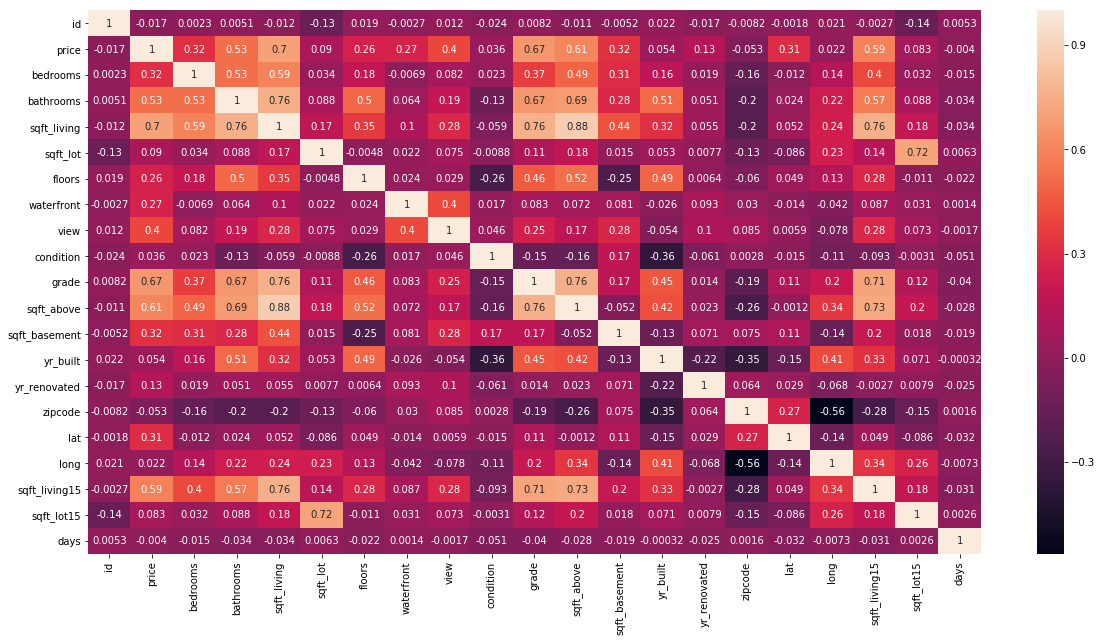

In [0]:
# Ensure the plot displays in a large enough size to be readable
plt.figure(figsize=(20,10))

# Create an annotated heatmap of the correlations

sns.heatmap(____, annot=True)

# The "annot" parameter tells the plot to display labels

In [0]:
corr_mat = data.corr()
# Filter by price column and sort descending
corr_mat['____'].sort_values(ascending=False)

price            1.000000
grade            0.617172
sqft_living      0.604351
sqft_living15    0.549388
sqft_above       0.515706
lat              0.440586
bathrooms        0.439813
bedrooms         0.293880
floors           0.269290
sqft_basement    0.221756
view             0.212300
sqft_lot         0.094969
sqft_lot15       0.082999
long             0.079642
yr_renovated     0.074992
yr_built         0.060989
waterfront       0.051178
condition        0.030849
id               0.018226
days            -0.009074
zipcode         -0.019257
Name: price, dtype: float64

In [0]:
labels = data[['price']]
features = data[['sqft_living']]
print(features.shape, labels.shape)


(21596, 1) (21596, 1)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)

Train Size (15117, 1) (15117, 1)
Test Size (6479, 1) (6479, 1)


In [0]:
sc =  StandardScaler().fit(X_train)
X_train =  sc.transform(X_train)
X_train = sm.add_constant(X_train)
X_test = sc.transform(X_test)
X_test = sm.add_constant(X_test)
print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)

Train Size (15117, 2) (15117, 1)
Test Size (6479, 2) (6479, 1)


In [0]:
# Create the model
model = sm.OLS(____, ____)
# Fit the model
model_results = model.fit()

In [0]:
# Evaluate the model
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:24:49   Log-Likelihood:            -2.1008e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.421e+05   2134.642    253.964      0.0

In [0]:
# Use our new model to make predictions
y_pred = model_results.predict(____)

Text(0, 0.5, 'Predicted')

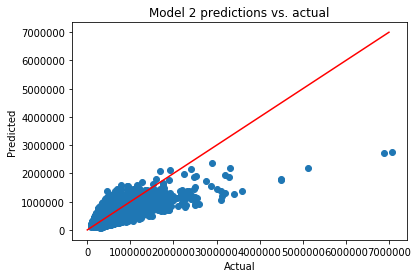

In [0]:
# Plot the predictions

# Build a scatterplot
plt.scatter(____, ____)

# Add a line for perfect correlation
plt.plot([x for x in range(0,7000000)],[x for x in range(0,7000000)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
labels = data['_____']
features = data.drop(['____'], axis=1)

print(features.shape, labels.shape)

(21596, 14) (21596,)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)
X_train_index = X_train.index
X_test_index = X_test.index

Train Size (15117, 14) (15117,)
Test Size (6479, 14) (6479,)


In [0]:
sc =  StandardScaler().fit(X_train)
X_train =  sc.transform(X_train)
X_train = sm.add_constant(X_train)
X_test = sc.transform(X_test)
X_test = sm.add_constant(X_test)
print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)

Train Size (15117, 15) (15117,)
Test Size (6479, 15) (6479,)


In [0]:
var_names = list(["const"])+ list(features.columns)
X_train = pd.DataFrame(X_train, columns = var_names, index = X_train_index)

In [0]:
# Create the model
model2 = sm.OLS(____, ____)
# Fit the model
model2_results = model2.fit()

In [0]:
# Evaluate the model
print(model2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     2227.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:25:28   Log-Likelihood:            -2.0674e+05
No. Observations:               15117   AIC:                         4.135e+05
Df Residuals:                   15102   BIC:                         4.136e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.421e+05   1713.062    316.464

In [0]:
# Use our new model to make predictions
y_pred = model2_results.predict(____)
y_pred

array([  97759.25634511,  335432.32580744,  357444.96073546, ...,
       1088431.42493418,  397122.37890772,  578014.55580791])

Text(0, 0.5, 'Predicted')

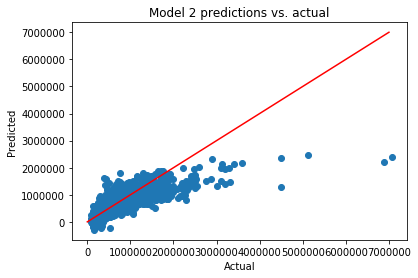

In [0]:
# Plot the predictions

# Build a scatterplot
plt.scatter(____, ____)

# Add a line for perfect correlation
plt.plot([x for x in range(0,7000000)],[x for x in range(0,7000000)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
y_test2 = y_test.values
residuals = ____ - ____
residuals

array([  34740.74365489,   79567.67419256,  136555.03926454, ...,
       -413431.42493418,   45377.62109228, -153064.55580791])

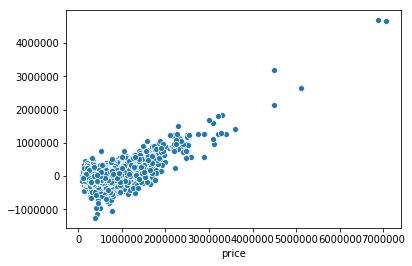

In [0]:
sns.scatterplot(x= ____, y= ____)

In [0]:
# New model for houses which price is less than $1'000,000
data = ____

In [0]:
labels = data['____']
features = data.drop(['____'], axis=1)

print(features.shape, labels.shape)

(20106, 18) (20106,)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)
X_train_index = X_train.index
X_test_index = X_test.index

Train Size (14074, 18) (14074,)
Test Size (6032, 18) (6032,)


In [0]:
sc =  StandardScaler().fit(X_train)
X_train =  sc.transform(X_train)
X_train = sm.add_constant(X_train)
X_test = sc.transform(X_test)
X_test = sm.add_constant(X_test)
print('Train Size', X_train.shape, y_train.shape)
print('Test Size', X_test.shape, y_test.shape)

Train Size (14074, 19) (14074,)
Test Size (6032, 19) (6032,)


In [0]:
var_names = list(["const"])+ list(features.columns)
X_train = pd.DataFrame(X_train, columns = var_names, index = X_train_index)

In [0]:
# Create the model
model2 = sm.OLS(____, ____)
# Fit the model
model2_results = model2.fit()

In [0]:
# Evaluate the model
print(model2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1816.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:26:43   Log-Likelihood:            -1.8333e+05
No. Observations:               14074   AIC:                         3.667e+05
Df Residuals:                   14056   BIC:                         3.668e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.684e+05    926.642    505.516

In [0]:
# Use our new model to make predictions
y_pred = model2_results.predict(____)
y_pred

array([581387.56540652, 847132.33795842, 301429.69138105, ...,
       499081.63532878, 553707.88586577, 487815.94955354])

Text(0, 0.5, 'Predicted')

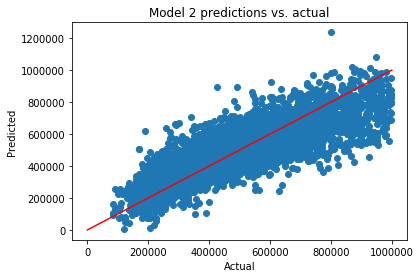

In [0]:
# Plot the predictions

# Build a scatterplot
plt.scatter(____, ____)

# Add a line for perfect correlation
plt.plot([x for x in range(0,1000000)],[x for x in range(0,1000000)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
y_test2 = y_test.values
residuals = ____ - ____
residuals

array([-128387.56540652,    7867.66204158,  -56429.69138105, ...,
           918.36467122, -178707.88586577,  -67815.94955354])

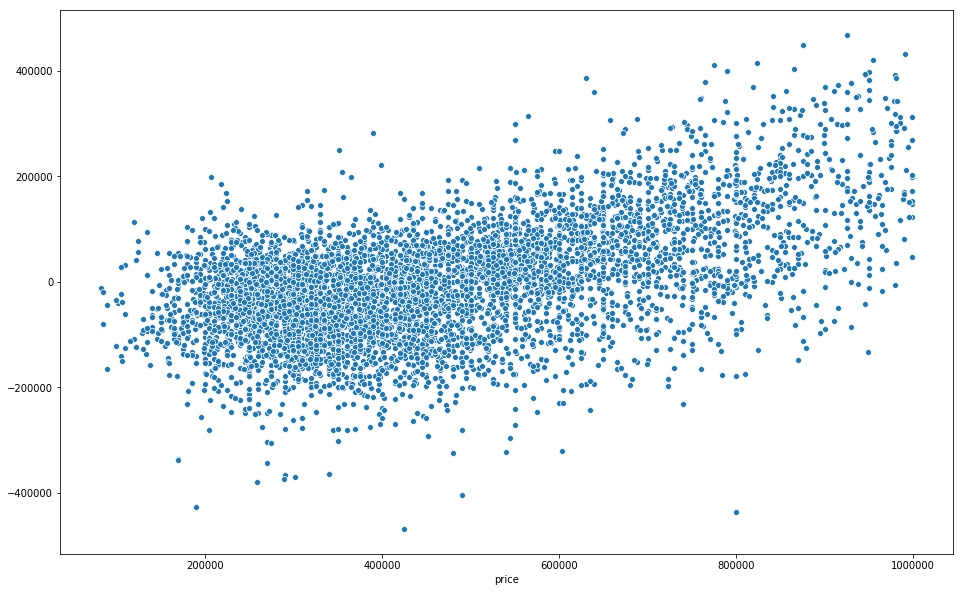

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x= ____, y= ____)

In [0]:
root_mean_squared_error = ____
root_mean_squared_error

106719.6101898343

In [0]:
mean_absolute_error = ____
mean_absolute_error

81705.97172399891

In [0]:
#In-sample prediction
y_insample = model2_results.predict(____)

Text(0, 0.5, 'Predicted')

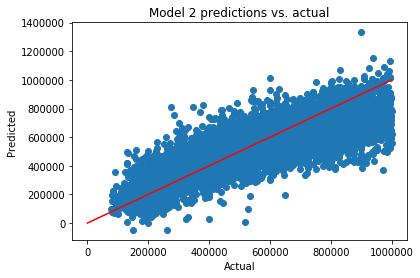

In [0]:
# Plot the predictions

# Build a scatterplot
plt.scatter(____, ____)

# Add a line for perfect correlation
plt.plot([x for x in range(0,1000000)],[x for x in range(0,1000000)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
model3 = sm.GLM(____, ____, family = sm.families.Gamma() )

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [0]:
res = model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                14074
Model:                            GLM   Df Residuals:                    14056
Model Family:                   Gamma   Df Model:                           17
Link Function:          inverse_power   Scale:                        0.073257
Method:                          IRLS   Log-Likelihood:            -1.8908e+05
Date:                Fri, 19 Jul 2019   Deviance:                       1745.8
Time:                        07:26:46   Pearson chi2:                 1.03e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.384e-06   5.48e-09    434.836

In [0]:
#prediction
y_pred2 = res.predict(____)
y_pred2

array([ 527066.49939573, 1079169.61020225,  316987.6972639 , ...,
        440139.88413689,  527459.98454368,  465941.48865491])

In [0]:
# Plot the predictions

# Build a scatterplot
plt.scatter(____, ____)

# Add a line for perfect correlation
plt.plot([x for x in range(0,1000000)],[x for x in range(0,1000000)], color='red').axis([])

# Label it nicely
plt.title("Model 2 predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
y_test2 = y_test.values
residuals =  ____ - ____
residuals

In [0]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x= ____, y= ____)